<a href="https://colab.research.google.com/github/pickachu17/Data-ScienceAIML/blob/main/Hosue_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House price Dataset

In [9]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=531)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
print(boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [25]:
#Loading the dataset to a pandas dataframe
boston_dataframe  = pd.DataFrame(boston.data, columns = boston.feature_names)

In [26]:
#Print First 5 rows of our DataFrame
boston_dataframe.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [27]:
# add the target column to the DataFrame
boston_dataframe['price'] = boston.target

In [28]:
# checking the number of rows and columns in the data frame
boston_dataframe.shape

(506, 14)

In [29]:
# check for missing values
boston_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [30]:
#statistical measures of the dataset
boston_dataframe.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation between various features in the dataset

1. Positive Correlation
2.Negative Correlation

In [32]:
correlation = boston_dataframe.corr()

<Axes: >

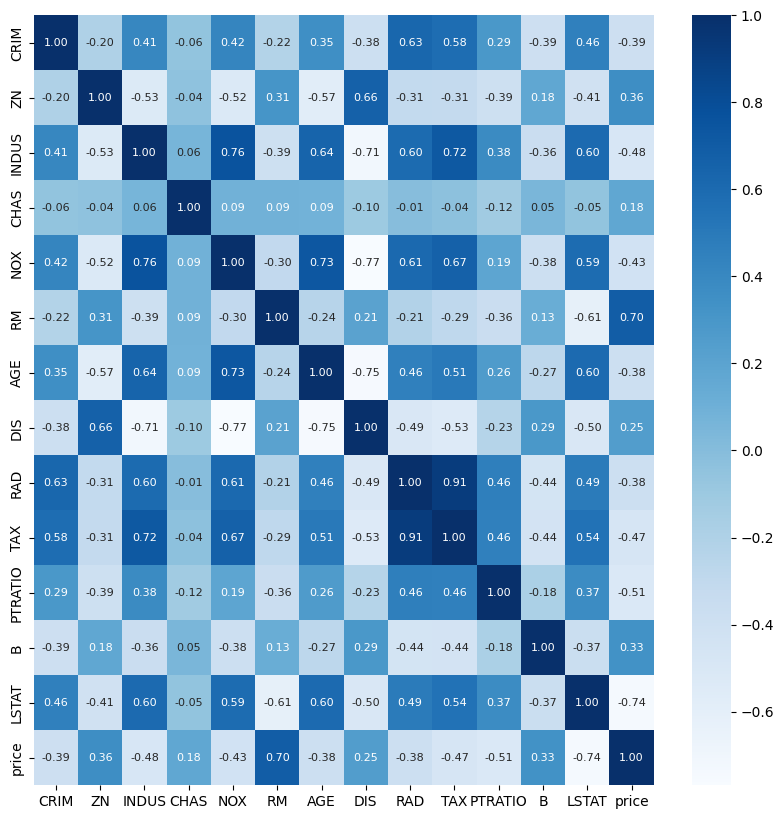

In [34]:
# constructing a heatmap to understand the correlation
plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

Spliting the data and Target

In [35]:
X = boston_dataframe.drop(['price'], axis=1)
Y = boston_dataframe['price']

In [36]:
print(X)
print(Y)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

splitting the data into Training data and Test Data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [39]:
# loading the model
model = XGBRegressor()

In [48]:
import pandas as pd

# Assuming 'X_train' is your training data
# Convert categorical variables into numerical format using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['CHAS', 'RAD'])

# Now, you can use X_train_encoded for training your XGBoost model


In [50]:
# Now, you can use X_train_encoded for training your XGBoost model

model.fit(X_train_encoded, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Trainong data

In [51]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train_encoded)

In [52]:
print(training_data_prediction)

[23.129572  20.98899   20.098524  34.697636  13.891189  13.500701
 21.999186  15.203756  10.887299  22.700909  13.825641   5.605713
 29.812687  49.982903  34.893307  20.60911   23.364561  19.188297
 32.697247  19.590614  26.979952   8.387171  46.001656  21.69874
 27.072975  19.376139  19.287758  24.801407  22.607407  31.704306
 18.520018   8.702463  17.404568  23.709328  13.301526  10.529668
 12.69158   25.011688  19.698687  14.909697  24.214027  24.996841
 14.913939  16.999763  15.589596  12.700841  24.517086  15.006639
 50.00096   17.541689  21.204374  32.00643   15.603263  22.891031
 19.332191  18.691536  23.293083  37.21507   30.101019  33.122566
 20.974577  49.995117  13.397423   5.00621   16.50108    8.406059
 28.679731  19.494532  20.587727  45.39527   39.79505   33.40481
 19.823696  33.398865  25.289234  49.99842   12.541762  17.430578
 18.614206  22.601854  50.01128   23.83737   23.323277  23.099203
 41.697178  16.123234  31.597397  36.087963   7.000961  20.390646
 19.996151  

In [54]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error :", score_1)
print('Mean Absolute Error : ',score_2)

R squared error : 0.999997068890209
Mean Absolute Error :  0.011350155348825032


Visualizing the actual Prices and predicted prices

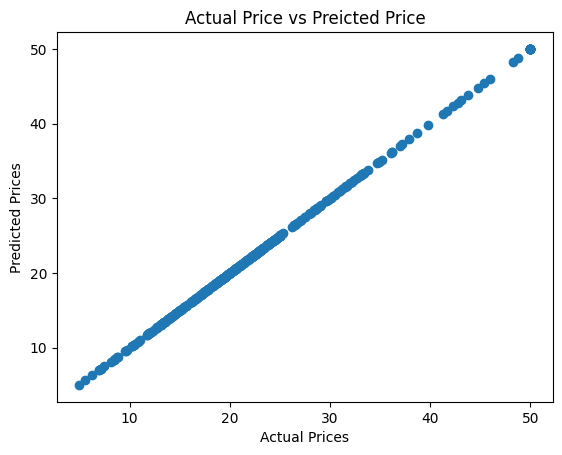

In [55]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [58]:
# Assuming 'X_test' is your testing data
# Convert categorical variables into numerical format using one-hot encoding
X_test_encoded = pd.get_dummies(X_test, columns=['CHAS', 'RAD'])

# Now, you can use X_test_encoded for making predictions using your trained model
test_data_prediction = model.predict(X_test_encoded)

In [59]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9161860906944524
Mean Absolute Error :  1.9699954210543165
